# scikit-learnの便利な関数

## Dataset-API

|データセット詳細|用途|load関数|
| ---- | ---- | ---- |
|アヤメの計測データ|分類|load_iris|
|糖尿病の診断データ|回帰|load_diabetes|
|数字の手書き文字|分類|load_digits|
|生理学的特徴と運動能力の関係|回帰|load_linnerud|
|ワインの科学的特徴|分類|load_wine|
|乳がんの診断データ|分類|load_breast_cancer|

In [1]:
########## 糖尿病の診断データのデータセットの確認
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes

# インスタンスの作成
diabetes = load_diabetes()

# DataFrame形式にデータ変換
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# df_diabetesの先頭8行の表示
print(df_diabetes.head(8))

# df_diabetesの末尾5行の表示
print(df_diabetes.tail(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
5 -0.076395 -0.041176 -0.096346    97.0  
6 -0.039493 -0.062917 -0.03835

In [ ]:
########## ワインの科学的特徴データセットの確認
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_wine

# インスタンスの作成
wine = load_wine()

# DataFrame形式にデータ変換
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)

df_wine['target'] = wine.target

print(df_wine)

## データ前処理

In [3]:
########## データの標準化【Standardscaler】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_wine

# データのロード
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_wine['target'] = wine.target

# 【preprocessing.StandardScaler()の引数】
#    引数copy:Trueの場合は元のデータは変換されず、Falseの場合は変換元のデータを使って変換する（デフォルトはTrue）
#    引数with_mean: Trueの場合は平均値を0とする。Falseの場合、Y=X/σの変換を施す（デフォルトはTrue）
#    引数with_std: Trueの場合は標準偏差を1とする。Falseの場合、Y=X−μの変換を施す（デフォルトはTrue）

# ライブラリのインポート
from sklearn.preprocessing import StandardScaler
# インスタンスの作成
sc = StandardScaler()
# データの適用
sc.fit(df_wine)        
# データの変換したものをDataFrame形式に変更
df_wine_sc = pd.DataFrame(sc.transform(df_wine), columns=df_wine.columns)

# 変換したデータの統計量確認
print(df_wine_sc.describe()['total_phenols'])

count    1.780000e+02
mean    -2.972030e-16
std      1.002821e+00
min     -2.107246e+00
25%     -8.854682e-01
50%      9.595986e-02
75%      8.089974e-01
max      2.539515e+00
Name: total_phenols, dtype: float64


In [4]:
########## データの正規化【Normalization】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_wine

# データのロード
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_wine['target'] = wine.target

# ライブラリのインポート
from sklearn.preprocessing import MinMaxScaler
# インスタンスの作成
ms = MinMaxScaler(feature_range=(0, 1))
# データの適用
ms.fit(df_wine)        
# データの変換したものをDataFrame形式に変更
df_wine_ms = pd.DataFrame(ms.transform(df_wine), columns=df_wine.columns)

# 変換したデータの統計量確認
df_wine_ms.describe().loc[['min','max']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
########## ラベルエンコード【LabelEncoder】
# ライブラリのインポート
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    '野菜名': ['キャベツ', 'レタス', 'ネギ', 'ネギ', 'ネギ', 'キャベツ'], 
    '値段（円）': ['100', '140', '120', '200', '80', '50'], 
})

# インスタンスの生成
le = LabelEncoder()

#　データの適用
le = le.fit(df['野菜名'])

#　ラベルを整数に変換
df['野菜名'] = le.transform(df['野菜名'])
df

,野菜名,値段（円）
0,0,100
1,2,140
2,1,120
3,1,200
4,1,80
5,0,50


In [4]:
########## ワンホットエンコード【OneHotEncoder】
#　ライブラリのインポート
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#　テストデータの用意
df = pd.DataFrame({
    '野菜名': ['キャベツ', 'レタス', 'ネギ', 'ネギ', 'ネギ', 'キャベツ']
})

# インスタンスの生成
enc = OneHotEncoder(sparse=False)

# ワンホットエンコード
df = pd.DataFrame(enc.fit_transform(df),columns=enc.categories_)
df

c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,キャベツ,ネギ,レタス
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0


## データ分割

In [5]:
########## 学習データとテストデータへの分割【train_test_split】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)

# 全データの大きさ
print(df_diabetes.shape)

# 【train_test_split()の引数】
#    位置引数
#        第一引数(可変長): 分割の対象となる配列。
#    キーワード引数
#        引数test_size:テストデータの割合または個数を指定（0.0 ~ 1.0の割合か、個数を指定）
#        引数train_size: 学習データの割合または個数を指定（0.0 ~ 1.0の割合か、個数を指定）
#        引数shuffle: Trueの場合はデータのシャッフルを行う
#        引数random_state: 乱数シードを指定

#    X_train:説明変数の学習用データ
#    X_test:説明変数のテスト用データ
#    y_train:目的変数の学習用データ
#    y_test:目的変数のテスト用データ

# データの分割
X_train, X_test, y_train, y_test = train_test_split(df_diabetes,diabetes.target,train_size = 0.6 ,random_state=0)

# 学習データの大きさ
print(X_train.shape)
print(y_train.shape)

# テストデータの大きさ
print(X_test.shape)
print(y_test.shape)

(442, 10)
(265, 10)
(265,)
(177, 10)
(177,)


In [7]:
########## K-分割交差検証【KFold】
# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.datasets import load_diabetes

# データのロード
diabetes = load_diabetes()

# 【KFold()の引数】
#    引数 n_split: データの分割数、デフォルトは5
#    引数 shuffle: 連続する数字のグループ分けとするか（True もしくはFalse）
#    引数 random_state: 乱数の設定

# 交差検証（fold=3）
kf = KFold(n_splits=3, shuffle=True, random_state=0)
for fold,(train_index, test_index) in enumerate(kf.split(diabetes.data, diabetes.target)):
    print("Fold：{}".format(fold),"len(train_index)：{}".format(len(train_index)), "len(test_index)：{}".format(len(test_index)))
    

Fold：0 len(train_index)：294 len(test_index)：148
Fold：1 len(train_index)：295 len(test_index)：147
Fold：2 len(train_index)：295 len(test_index)：147


In [8]:
########## 層化K-分割交差検証【StratifiedKFold】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold

# データのロード
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_wine['target'] = wine.target

# 【StratifiedKFold()の引数】
#    引数 n_split: データの分割数、デフォルトは5
#    引数 shuffle: 連続する数字のグループ分けとするか（True もしくはFalse）
#    引数 random_state: 乱数の設定

kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
for fold,(train_index, test_index) in enumerate(kf.split(wine.data, df_wine['target'])):
    print('FOLD{}'.format(fold))
    print(df_wine.iloc[train_index]['target'].value_counts(True))

FOLD0
1    0.398305
0    0.330508
2    0.271186
Name: target, dtype: float64
FOLD1
1    0.403361
0    0.327731
2    0.268908
Name: target, dtype: float64
FOLD2
1    0.394958
0    0.336134
2    0.268908
Name: target, dtype: float64


In [9]:
########## グループ付き交差検証【GroupKFold】
# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import GroupKFold

# データの準備
df = pd.DataFrame([[1, 2], [3, 4], [5, 6], [7, 8]],columns=['col1','col2'])
df['target'] = [1, 2, 3, 4]
df['group'] = [0, 0, 2, 2]

# 【GroupKFold()の引数】
#    引数n_split: データの分割数、デフォルトは5

# GroupKFold
kf = GroupKFold(n_splits=2)
for fold,(train_index, test_index) in enumerate(kf.split(df[['col1','col2']], df['target'],df['group'])):
    print('FOLD{}'.format(fold))
    print(df.iloc[train_index]['group'].value_counts(True))

FOLD0
0    1.0
Name: group, dtype: float64
FOLD1
2    1.0
Name: group, dtype: float64


In [10]:
########## 時系列データ分割【TimeSeriesSplit】
# ライブラリのインポート
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

# 【TimeSeriesSplit()の引数】
#    引数n_split: データの分割数、デフォルトは5

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


# 教師あり学習

## 線形回帰【LinearRegression】 

In [ ]:
# 【LinearRegression()の引数】
#    引数fit_intercept:Falseの場合、切片を求める計算を含まない（デフォルトはTrue）
#    引数normalize:Trueの場合、説明変数を正規化する（デフォルトはFalse）
#    引数copy_X: メモリ内でデータを複製するか(デフォルトはTrue)
#    引数n_jobs: 計算に使うジョブの数
# 【sklearn.linear_model.LinearRegressionクラスのメソッド】
#    fit(X, y[, sample_weight]):学習の実行
#    get_params([deep]):学習の際に用いたパラメータの取得
#    predict(X): 予測の実行
#    score(X, y[, sample_weight]): 決定係数の算出
#    set_params(**params): パラメータの設定

In [11]:
########## 単回帰分析
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = LinearRegression()

# 説明変数bmi（肥満度を表す指標）
X = df_diabetes['bmi'].values.reshape(-1, 1)

# 目的変数target
Y = df_diabetes['target'].values

# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

[949.43526038]
152.13348416289617


In [13]:
########## 重回帰分析
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = LinearRegression()

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
152.13348416289597


## ロジスティック回帰【LogisticRegression】

In [ ]:
# 【LogisticRegression()の引数】
#    引数penalty:ペナルティ関数の設定（l1：L1正則化、l2：L2正則化）
#    引数C:正則化の影響度の設定
#    引数random_state:乱数
#    引数solver: 最適化のアルゴリズム('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
#    引数max_iter: 収束計算の最大試行回数
#    引数n_jobs: 計算に使うジョブの数
#
# 【sklearn.linear_model.LogisticRegressionクラスのメソッド】
#     fit(X, y[, sample_weight]):学習の実行
#     get_params([deep]):学習の際に用いたパラメータの取得
#     predict(X): 予測の実行
#     predict_proba(X): 予測の実行(確率値)
#     score(X, y[, sample_weight]): 決定係数の算出
#     set_params(**params): パラメータの設定

In [14]:
########## ロジスティック回帰を使った2値分類
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データのロード
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data,columns=breast.feature_names)
df_breast['target'] = breast.target

# インスタンス作成
clf = LogisticRegression(solver='liblinear')

# 説明変数
X = df_breast[breast.feature_names].values

# 目的変数target
Y = df_breast['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 予測したモデルで未知データに対して予測
clf.predict_proba(X_test)

# 精度算出
accuracy_score(y_test,clf.predict(X_test))

0.956140350877193

In [15]:
########## ロジスティック回帰を使った多値分類
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データのロード
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_wine['target'] = wine.target

# インスタンス作成
clf = LogisticRegression(solver='liblinear')

# 説明変数
X = df_wine[wine.feature_names].values

# 目的変数target
Y = df_wine['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 精度算出
print(accuracy_score(y_test,clf.predict(X_test)))

0.9444444444444444


## ランダムフォレスト【RandomForest】 

In [ ]:
# 【RandomForestClassifier()、またはのRandomForestRegressor()の引数】
#    引数n_estimators:決定木の個数を指定
#    引数criterion:決定木のデータ分割の指標('gini-cg', 'entropy'）(デフォルトはgini)
#    引数max_depth: 決定木の深さの最大値を指定
#    引数n_jobs: 計算に使うジョブの数
#    引数random_state: 乱数
#    引数verbose: モデル構築の過程のメッセージを出すかどうか（デフォルトは0）
#
# 【クラスのメソッド】
#    fit(X, y[, sample_weight]):学習の実行
#    get_params([deep]):学習の際に用いたパラメータの取得
#    predict(X): 予測の実行
#    score(X, y[, sample_weight]): 決定係数の算出
#    feature_importances_: 説明変数の特徴量重要度
#    set_params(**params): パラメータの設定の確認

In [16]:
########## ランダムフォレストを使った分類
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データのロード
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data,columns=breast.feature_names)
df_breast['target'] = breast.target

# インスタンス作成
clf = RandomForestClassifier(random_state=0)

# 説明変数
X = df_breast[breast.feature_names].values

# 目的変数target
Y = df_breast['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 特徴量重要度
feature_importance = pd.DataFrame({'feature':breast.feature_names,'importances':clf.feature_importances_}).sort_values(by="importances", ascending=False)

print(feature_importance.head())

                 feature  importances
22       worst perimeter     0.172054
27  worst concave points     0.142027
20          worst radius     0.095563
7    mean concave points     0.086691
6         mean concavity     0.079866


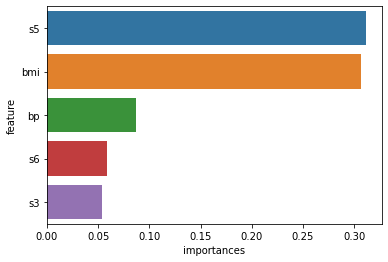

In [17]:
########## ランダムフォレストを使った回帰
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = RandomForestRegressor(random_state=0)

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 特徴量重要度
feature_importance = pd.DataFrame({'feature':diabetes.feature_names,'importances':clf.feature_importances_}).sort_values(by="importances", ascending=False)

# 可視化
sns.barplot(x="importances", y="feature", data=feature_importance.head())
plt.show()

## サポートベクターマシン【SupportVectorMachine】 

In [ ]:
# 【scikit-learnに実装されているSVM】
#     分類問題に使用する SVM （Support Vector Classification）
#         SVC （C-Support Vector Classification）
#             標準的なソフトマージン(エラーを許容する)SVM
#         LinearSVC （Linear Support Vector Classification）
#             カーネルが線形カーネルの場合に特化したSVM
#         NuSVC （Nu-Support Vector Classification）
#             エラーを許容する表現が異なるSVM
#     回帰問題に使用する SVM （Support Vector Regression）参考
#         SVR
#         LinearSVR
#         NuSVR
#     異常検知に使用する SVM
#         OneClassSVM

# 【SVC()の引数】
#     引数C:正則化のパラメータ
#     引数kernel:アルゴリズムで使用するカーネルタイプ（'linear'、 'poly'、 'rbf'、 'sigmoid'、 'precomputed'）
#     引数degree: 多項式カーネル関数の次数（kernel='poly'の時のみ有効）
#     引数gamma: カーネルがrbf、poly、sigmoidの時のカーネル係数。
#     引数random_state: 乱数
#     引数verbose: モデル構築の過程のメッセージを出すかどうか（デフォルトは0）

In [1]:
########## サポートベクターマシンを使った分類【GridSearchCV】
# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

# データのロード
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data,columns=breast.feature_names)
df_breast['target'] = breast.target

# インスタンス作成
clf = SVC(random_state=0)

# 説明変数
X = df_breast[breast.feature_names].values

# 目的変数target
Y = df_breast['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 探索用のパラメータ設定
params = {
    "C":np.arange(0.1,1,0.05),
    "kernel":["rbf"],
    "gamma":np.arange(0.1,1,0.5)
}

# グリッドサーチの設定
clf = GridSearchCV(clf, params,scoring="accuracy", cv=3)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 最適なパラメータの表示
print(clf.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


## K近傍法【K-NearestNeighbor】 

In [ ]:
# 【KNeighborsClassifier()、またはのKNeighborsRegressor()の引数】
#     引数n_neighbors:近傍オブジェクト数（デフォルトは5）
#     引数weights:重み('uniform', 'distance'）(デフォルトはuniform)
#     引数algorithm: アルゴリズム選択('ball_tree', 'kd_tree' ,'brute' ,'auto'）(デフォルトはauto)
#     引数leaf_size: リーフサイズ（デフォルトは30）
#     引数n_jobs: 計算に使うジョブの数
#     引数verbose: モデル構築の過程のメッセージを出すかどうか（デフォルトは0）

# 【クラスのメソッド】
#     fit(X, y[, sample_weight]):学習の実行
#     get_params():学習の際に用いたパラメータの取得
#     predict(X): 予測の実行
#     score(X, y[, sample_weight]): 決定係数の算出
#     set_params(**params): パラメータの設定の確認

In [1]:
########## K近傍法を使った分類
# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データのロード
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data,columns=breast.feature_names)
df_breast['target'] = breast.target

# インスタンス作成
clf = KNeighborsClassifier(n_neighbors=3)

# 説明変数
X = df_breast[breast.feature_names].values

# 目的変数target
Y = df_breast['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 精度算出
accuracy_score(y_test,clf.predict(X_test))

0.9122807017543859

In [2]:
########## K近傍法を使った回帰
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = KNeighborsRegressor()

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 作成したモデルの表示
print(clf)

KNeighborsRegressor()


# 教師なし学習

## PCA

In [ ]:
# 【PCA()の引数】
#     引数n_components:圧縮後の次元数
#     引数copy:Falseの場合、変換するデータを上書きする（デフォルトはTrue）
#     引数whiten: Trueの場合、白色化とよばれる、変数間の相関をなくす処理を行う（デフォルトはFalse）
#     引数svd_solver: 特異値分解のソルバ('auto', 'full', 'arpack', 'randomized')
#     引数random_state: 乱数

# 【クラスのメソッド】
#     fit(X):学習の実行
#     fit_transform(X):PCA変換
#     transform(X): fitやfit_transformで定義したPCA変換
#     sinverse_transform(X): PCAの逆変換

In [3]:
########## PCAを使った次元削減
# ライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# データの準備
iris = load_iris()
X = iris.data
y = iris.target

# 次元削減前
print(X.shape)

# インスタンス作成からPCA実行
pca = PCA(n_components=3)
pca.fit(X)
X_ = pca.transform(X)

# 次元削減後
print(X_.shape)

(150, 4)
(150, 3)


## k-means

In [ ]:
# 【k-means()の引数】
#     引数n_clusters: クラスタ数(デフォルトは8)
#     引数max_iter:繰り返し回数の最大(デフォルトは300)
#     引数n_init: 初期値選択において、異なる乱数のシードで初期の重心を選ぶ処理の実行回数(デフォルトは10)
#     引数init: 初期化の方法('k-means++', 'random')(デフォルトは'k-means++')
#     引数tol:収束判定に用いる許容可能誤差(デフォルトは0.0001)
#     引数random_state: 乱数
#     引数copy_x: メモリ内でデータを複製してから実行するかどうか(デフォルトはTrue)
#     引数n_jobs: 並列処理する場合の多重度（デフォルトは1）

# 【クラスのメソッド】
#     fit(X):クラスタリングの計算の実行
#     fit_predict(X):各サンプルに対する、クラスタ番号を求める
#     fit_transform(X): クラスタリングの計算を行い、Xを分析に用いた距離空間に変換して返す
#     predict(X): Xのサンプルが属しているクラスタ番号を返す
#     inertia_: 各クラスター内の二乗誤差を返す

In [5]:
########## k-meansを使ったクラスタリング（分類）
# ライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# データの準備
iris = load_iris()
X = iris.data
y = iris.target

# インスタンス作成
kms = KMeans(n_clusters=3,random_state=0, n_init='auto') # n_initは設定しないと警告出る

# クラスタリング実行
print(kms.fit_predict(X))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

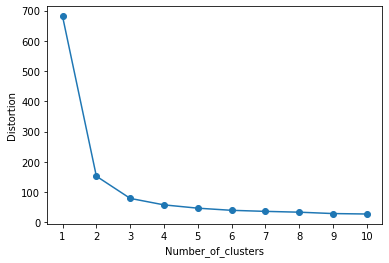

In [7]:
########## エルボー法を使ったk-meansクラスタリング
# エルボー法とは正解ラベルがわかっていない状態で、データの適切なクラスタ数を推定する手法
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris,load_wine

# データセットの作成
iris = load_iris()
X = iris.data
Y = iris.target

# エルボー法の実施
distortions = []

# クラスター数1~10を一気に計算
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    # クラスタリングの実行
    km.fit(X)
    # 各々のクラスタでの誤差を算出し、リストに格納
    distortions.append(km.inertia_)

# グラフのプロット
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number_of_clusters")
plt.ylabel("Distortion")
plt.show()

## t-SNE

In [ ]:
# 【TSNE()の引数】
#     引数n_components:削減次元数(デフォルトは2)
#     引数perplexity:最近傍の数(デフォルトは30)
#     引数early_exaggeration:密集度合の設定(デフォルトは12.0)
#     引数learning_rate:t-SNEの学習率(デフォルトは200.0)
#     引数n_iter:最適化の最大反復回数(デフォルトは1000)
#     引数random_state: 乱数
#     引数n_jobs: 並列処理する場合の多重度（デフォルトは1）

# 【クラスのメソッド】
#     fit(X):計算の実行
#     fit_transform(X): 変換された出力を表示する
#     gets_params: パラメータの取得
#     set_params: パラメータの設定

In [8]:
########## t-SNEを使った次元圧縮
# ライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# データの準備
iris = load_iris()
X = iris.data
y = iris.target

# 次元削減前
print(X.shape)

# インスタンス作成
tsne = TSNE(n_components=2,random_state=0)

# 次元削減後
print(tsne.fit_transform(X).shape)

(150, 4)
(150, 2)


# 機械学習モデルの評価

## 分類問題に対しての評価 

In [9]:
########## AccuracyScore
# ライブラリのインポート
from sklearn.metrics import accuracy_score

# 予測ラベル
y_pred = [0, 2, 1, 3]

# 正解ラベル
y_true = [0, 1, 2, 3]

# accuracyの算出
print(accuracy_score(y_true, y_pred))

0.5


[[46  1]
 [ 3 64]]


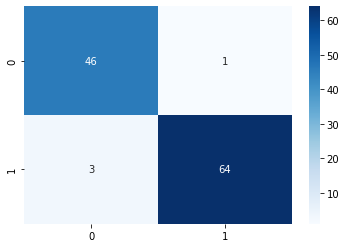

In [10]:
########## ConfusionMatrix【混合行列】

    # 真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）
    # 真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）
    # 偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）
    # 偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）
#  		予測 	
# 		Negative 	Positive
# 実際 	Negative 	TN 	FP
# 	 	Positive 	FN 	TP

# ライブラリのインポート
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# データのロード
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data,columns=breast.feature_names)
df_breast['target'] = breast.target

# インスタンス作成
clf = RandomForestClassifier(random_state=0)

# 説明変数
X = df_breast[breast.feature_names].values

# 目的変数target
Y = df_breast['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# 推定ラベル
y_pred = clf.predict(X_test)

# 混合行列の作成
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ヒートマップの作成
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [11]:
########## ClassificationReport
# ClassificationReportは分類問題の結果を様々な指標を元に集計したテキストレポート
# ライブラリのインポート
from sklearn.metrics import classification_report

# 正解ラベル
y_true = [0, 1, 2, 2, 2]

# 推定ラベル
y_pred = [0, 0, 2, 2, 1]

# 目的変数の各クラス名
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## 回帰問題に対しての評価

In [12]:
########## MeanAbsoluteError【平均絶対誤差】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = KNeighborsRegressor()

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# MAE算出
print(mean_absolute_error(y_test, clf.predict(X_test)))

49.49213483146069


In [13]:
########## MeanSquaredError【平均二乗誤差】
# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = KNeighborsRegressor()

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# MSE算出
print(mean_squared_error(y_test, clf.predict(X_test)))

# RMSE算出
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))


4243.422022471909
65.14155373087065


In [14]:
########## R²Score【決定係数】
# ライブラリのインポート
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# データのロード
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = LinearRegression()

# 説明変数bmi(肥満度を表す指標)
X = df_diabetes['bmi'].values.reshape(-1, 1)

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

# R2score算出
print(r2_score(y_test, clf.predict(X_test)))


0.19057346847560142
